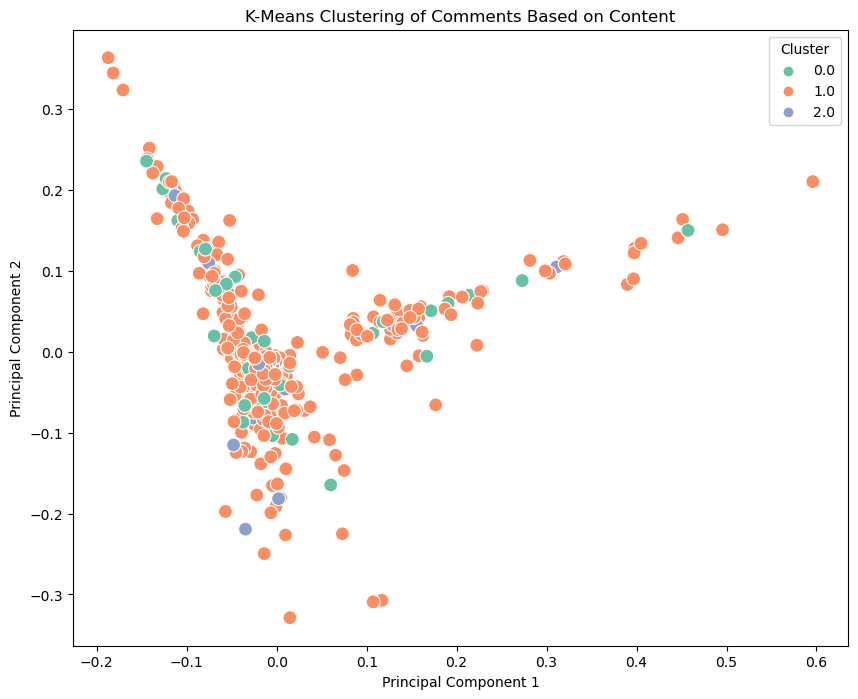

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

#Load the dataset
df = pd.read_csv('final_hateXplain.csv')

# Drop rows with Nan values
df.dropna(inplace=True)

# note stopwords with user and number
custom_stop_words = ENGLISH_STOP_WORDS.union({'user', 'number'})  # Combine sets
custom_stop_words_list = list(custom_stop_words)  # Convert to list

# preprocess comments using TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words_list, max_df=0.95, min_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(df['comment'])

# Apply K-Means Clustering
n_clusters = 3  # Adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)  # Assign cluster labels

# Visualise clusters using PCA
pca = PCA(n_components=2)  #make it 2D for visualisation
X_pca = pca.fit_transform(X_tfidf.toarray())

# Create a df for plotting
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['cluster'] = df['cluster']

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_plot, palette='Set2', s=100)
plt.title('K-Means Clustering of Comments Based on Content')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [5]:
# Get words from the TF-IDF vectorizer
terms = tfidf_vectorizer.get_feature_names_out()

# find top words for each cluster
def get_top_words(cluster_centers, terms, n_words=10):
    top_words = []
    for i, center in enumerate(cluster_centers):
        top_indices = np.argsort(center)[-n_words:]  # Get top words
        top_terms = [terms[ind] for ind in top_indices]
        top_words.append((i, top_terms))
    return top_words

# Get top words for each cluster
top_words_per_cluster = get_top_words(kmeans.cluster_centers_, terms)

# Display top words for each cluster
for cluster_id, words in top_words_per_cluster:
    print(f"Cluster {cluster_id}: {', '.join(words)}")

Cluster 0: faggot, white, really, asshole, mentally, like, just, fucking, people, retarded
Cluster 1: retard, people, just, muslim, like, refugees, ghetto, white, illegal, immigrants
Cluster 2: like, shit, niggers, sand, fuck, faggot, hate, retard, fucking, nigger


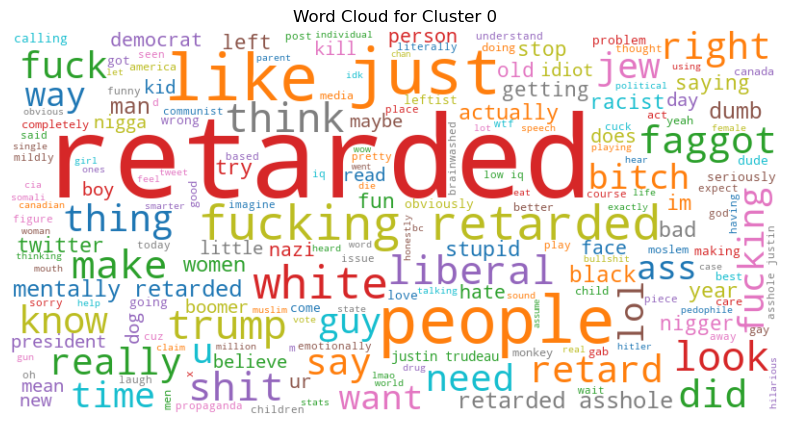

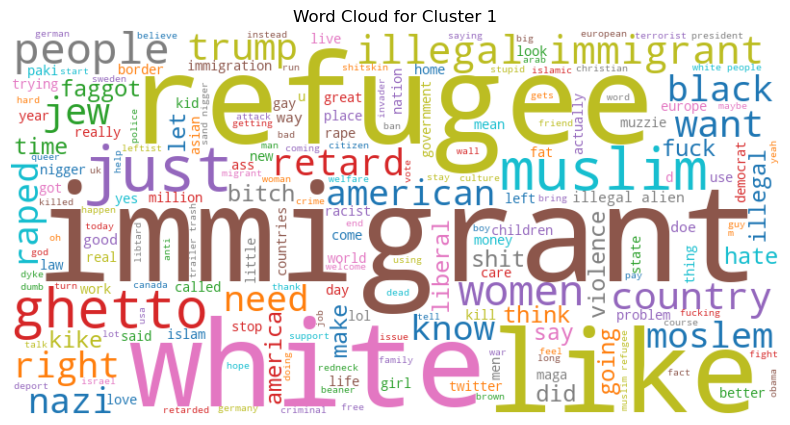

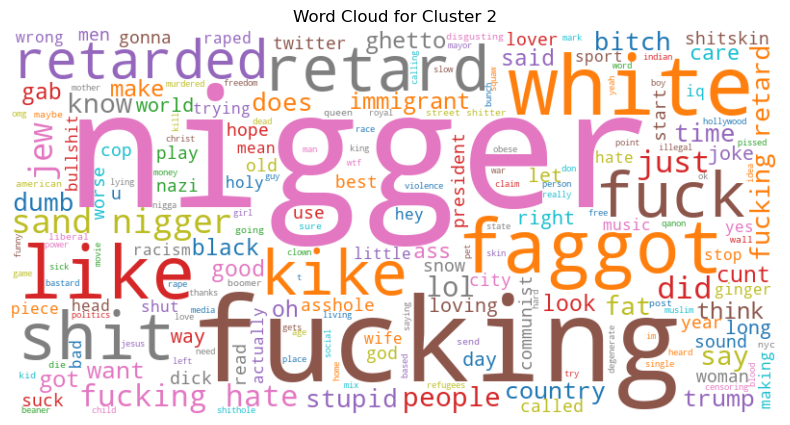

In [6]:
# generate word cloud for each cluster
def generate_word_clouds(df, n_clusters):
    for cluster_id in range(n_clusters):
        comments = ' '.join(df[df['cluster'] == cluster_id]['comment'])
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10',
                              stopwords=custom_stop_words_list).generate(comments)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Cluster {cluster_id}')
        plt.show()

# Generate word clouds
generate_word_clouds(df, n_clusters)